# Retail Sales & Customer Behavior Analysis

In [17]:
import pandas as pd

# Using a raw string to correctly handle the file path
file_path = r"C:\Users\hp\Downloads\OnlineRetail.csv"

# Add the encoding parameter to fix the UnicodeDecodeError
# Latin 1 is the common encoding for this type of data
df = pd.read_csv(file_path, encoding = 'latin1')

# Display the first 5 rows to make sure that it loaded correctly
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [18]:
# Check the number of missing values in each column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [19]:
# Check for duplicate row in the entire dataframe
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 5268


In [20]:
# Get a consice summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [21]:
# Data Cleaning
# Remove duplicate rows and keep the first occurence
df.drop_duplicates(inplace = True)

# Verify that duplicates have been removed
print(f"Number of duplicates row after removal: {df.duplicated().sum()}")

Number of duplicates row after removal: 0


In [22]:
# Remove rows where CustomerID is missing
df.dropna(subset=['CustomerID'], inplace = True)

# Verify that missing CustomerID values have been removed
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [23]:
# Checking the information for converting Invoicedate - Datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [24]:
# Converting InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verify the data type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [25]:
# Check for negative values in 'Quantity'
print(f"Number of negative quantity values: {(df['Quantity']<0).sum()}")

# Check for negative values in 'unit prices'
print(f"Number of negative unit price values: {(df['UnitPrice']<0).sum()}")

Number of negative quantity values: 8872
Number of negative unit price values: 0


In [26]:
# Create a new DataFrame containing only the returns (where Quantity is negative)
return_df = df[df['Quantity'] < 0]

# Create our main sales DataFrame containing only positive quantities
sales_df = df[df['Quantity'] > 0]

In [27]:
# Check for negative quantities in the new sales DataFrame
print(f"Number of negative quantity values in sales data: {(sales_df['Quantity'] < 0).sum()}")

# Print the size of the final sales DataFrame to show how much data we have to work with
print(f"Final sales DataFrame size: {sales_df.shape}")

Number of negative quantity values in sales data: 0
Final sales DataFrame size: (392732, 8)


In [28]:
 # Exploratory Data Analysis (EDA)
# Create a new 'Revenue' column by multiplying 'Quantity' and 'UnitPrice'
sales_df['Revenue'] = sales_df['Quantity'] * sales_df['UnitPrice']

# Display the first few rows to see the new column
print(sales_df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  


C:\Users\hp\AppData\Local\Temp\ipykernel_11896\1764290242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Revenue'] = sales_df['Quantity'] * sales_df['UnitPrice']


In [29]:
# Group by 'Description' and sum the 'Revenue' to find the total revenue for each product
# Then, sort in descending order and display the top 10
top_10_products = sales_df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products by Revenue:")
print(top_10_products)

Top 10 Best-Selling Products by Revenue:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: Revenue, dtype: float64


In [30]:
# Group by 'CustomerID' and sum the 'Revenue' to find the total revenue for each customer
# Then, sort in descending order and display the top 10
top_10_customers = sales_df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Revenue:")
print(top_10_customers)


Top 10 Customers by Total Revenue:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: Revenue, dtype: float64


In [31]:
# Analyze Monthly Sales Trends
# Extract the month from the 'InvoiceDate'
sales_df['Month'] = sales_df['InvoiceDate'].dt.month

# Group by month and sum the 'Revenue'
monthly_sales = sales_df.groupby('Month')['Revenue'].sum()

# Print the monthly sales data
print("\nMonthly Sales Trends: ")
print(monthly_sales)


Monthly Sales Trends: 
Month
1      568101.310
2      446084.920
3      594081.760
4      468374.331
5      677355.150
6      660046.050
7      598962.901
8      644051.040
9      950690.202
10    1035642.450
11    1156205.610
12    1087613.170
Name: Revenue, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_11896\3544891138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Month'] = sales_df['InvoiceDate'].dt.month


In [32]:
 # Analyze Sales by Country
# Group by 'Country' and sum the 'Revenue'
country_sales = sales_df.groupby('Country')['Revenue'].sum().sort_values(ascending = False)

# Print the sales data by country
print("\nSales by Country(Top 10): ")
print(country_sales.head(10))


Sales by Country(Top 10): 
Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: Revenue, dtype: float64


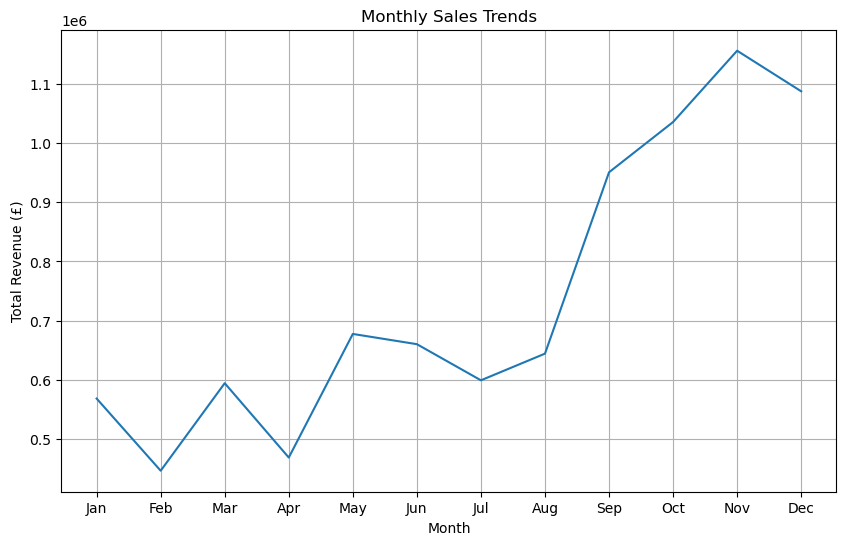

In [34]:
import matplotlib.pyplot as plt

# Plotting the monthly sales data
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

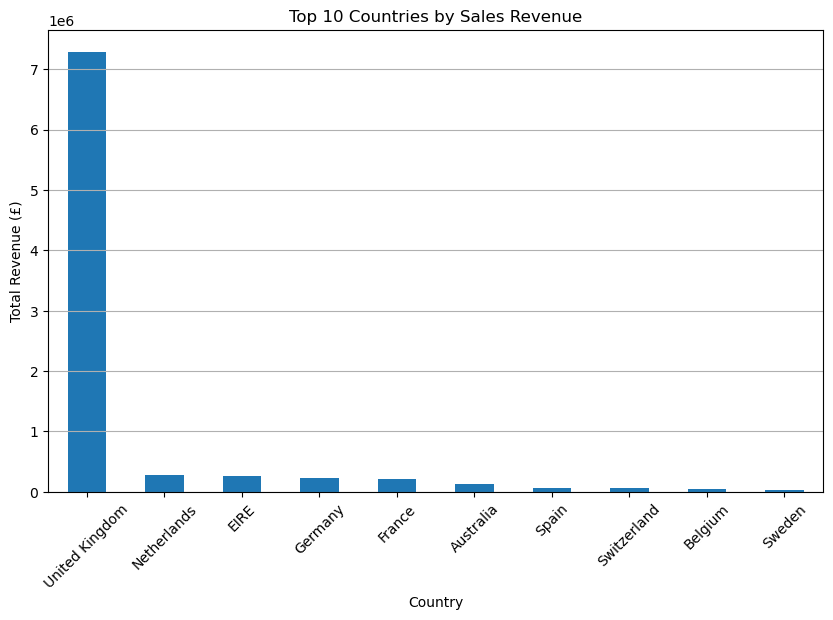

In [35]:
# Plotting the top 10 countries by sales
country_sales.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Sales Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

---